In [12]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('Taz_Water.csv')

In [14]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df.shape

(59400, 41)

In [15]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

# Explorations of Problems

In [16]:
df['status_group'] = df['status_group'].replace('functional needs repair','functional')

In [17]:
df['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [18]:
df.groupby('quantity').count()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
quantity,,,,,,,,,,,,,,,,,,,,,
dry,6246,6246,6246,5781,6246,5782,6246,6246,6246,6246,...,6246,6246,6246,6246,6246,6246,6246,6246,6246,6246
enough,33186,33186,33186,31963,33186,31964,33186,33186,33186,33186,...,33186,33186,33186,33186,33186,33186,33186,33186,33186,33186
insufficient,15129,15129,15129,13950,15129,13940,15129,15129,15129,15129,...,15129,15129,15129,15129,15129,15129,15129,15129,15129,15129
seasonal,4050,4050,4050,3414,4050,3415,4050,4050,4050,4050,...,4050,4050,4050,4050,4050,4050,4050,4050,4050,4050
unknown,789,789,789,657,789,644,789,789,789,789,...,789,789,789,789,789,789,789,789,789,789


# The qunatity of Water per Well

### What is the quantity of Water per Well?

In [19]:
b = df.groupby(['status_group', 'quantity']).count()['id'].reset_index()

px.bar(x = b['quantity'], y = b['id'], color = b['status_group'],text_auto=True, barmode="group",
      title="The Quantity of Water per Status of Well",
       labels={'x':'Quantity', 'y':'Number of Wells', 'color':'Status of Well'})


# Distribution of Amount of water avaiable 

## Use tableu to plot the geo locations

<AxesSubplot:ylabel='Frequency'>

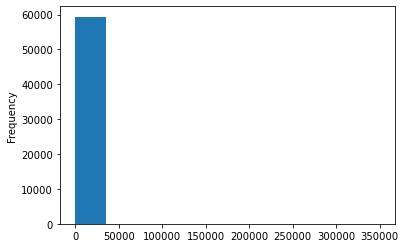

In [20]:
df['amount_tsh'].plot(kind = 'hist')

# Distribution of Amount of water avaiable 

In [21]:
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [22]:
bas = df.groupby(['status_group', 'scheme_management']).count()['id'].reset_index()
bas.head()

,status_group,scheme_management,id
0,functional,Company,571
1,functional,None,1
2,functional,Other,480
3,functional,Parastatal,1168
4,functional,Private operator,752


In [23]:

px.bar(x = bas['scheme_management'], y = bas['id'], color = bas['status_group'],text_auto=True, barmode="group",
      title="Who Operates the Waterpoint per Status of Well",
       labels={'x':'Operator', 'y':'Number of Wells', 'color':'Status of Well'})

# Drinkable or Undrinkable Water

In [24]:
'village water committee'
'Water User Groups'
'Water User Associations'

'Water User Associations'

In [25]:
df['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [26]:
df['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [27]:
water_q = {'good': 'Drinkable', 'salty':'Undrinkable', 'unknown': 'Undrinkable', 
          'milky': 'Undrinkable', 'colored':'Undrinkable', 'fluoride': 'Undrinkable'}

In [28]:
df['binary_water_qual'] = df['quality_group'].map(water_q)

In [29]:
df['binary_water_qual'].value_counts()

Drinkable      50818
Undrinkable     8582
Name: binary_water_qual, dtype: int64

In [30]:
water = df.groupby(['status_group', 'binary_water_qual']).count()['id'].reset_index()
water

,status_group,binary_water_qual,id
0,functional,Drinkable,32664
1,functional,Undrinkable,3912
2,non functional,Drinkable,18154
3,non functional,Undrinkable,4670


In [31]:
px.bar(x = water['binary_water_qual'], y = water['id'], color = water['status_group'],text_auto=True, barmode="group",
      title="Drinkable Water per Status of Well",
       labels={'x':'Water Quality', 'y':'Number of Wells', 'color':'Status of Well'}
       ,width=800, height=500)

# What type of Extration is the Wells using

In [32]:
df['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [33]:
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [34]:
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [35]:
extra = df.groupby(['status_group', 'extraction_type_class']).count()['id'].reset_index()
extra.head()

,status_group,extraction_type_class,id
0,functional,gravity,18749
1,functional,handpump,11370
2,functional,motorpump,1273
3,functional,other,1235
4,functional,rope pump,310


In [36]:
px.bar(x = extra['extraction_type_class'], y = extra['id'], color = extra['status_group'],text_auto=True, barmode="group",
      title="Who Operates the Waterpoint per Status of Well",
       labels={'x':'Extraction Type', 'y':'Number of Wells', 'color':'Status of Well'})

In [37]:
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

# Funder

In [38]:
df['funder'].isna().sum()

3635

In [39]:
df['funder'].fillna(value='Unknown',inplace=True)
df['funder'].replace(to_replace = '0', value ='Unknown' , inplace=True)

In [40]:
df['funder'].value_counts().head(20)

Government Of Tanzania    9084
Unknown                   4416
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Dhv                        829
Private Individual         826
Dwsp                       811
Norad                      765
Germany Republi            610
Tcrs                       602
Ministry Of Water          590
Water                      583
Dwe                        484
Name: funder, dtype: int64

In [41]:
df['funder_cat'] = df['funder'] #creating new column

c_fund = ['Danida','Unknown','Government Of Tanzania','Hesawa','Rwssp','World Bank','Kkkt', 'World Vision',
         'Unicef','Tasaf','District Council', 'Dhv', 'Private Individual', 'Dwsp','Norad','Germany Republi',
         'Tcrs','Ministry Of Water','Water','Dwe']
    

df.loc[~df["funder_cat"].isin(c_fund), "funder_cat"] = "Others"

In [42]:
df['funder_cat'].value_counts()

Others                    26451
Government Of Tanzania     9084
Unknown                    4416
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Dwe                         484
Name: funder_cat, dtype: int64

In [43]:
fun = df.groupby(['status_group', 'funder_cat']).count()['id'].reset_index()
fun.head()

,status_group,funder_cat,id
0,functional,Danida,1872
1,functional,Dhv,528
2,functional,District Council,423
3,functional,Dwe,239
4,functional,Dwsp,596


In [44]:
px.bar(x = fun['funder_cat'], y = fun['id'], color = fun['status_group'],text_auto=True, barmode="group",
      title="Who Operates the Waterpoint per Status of Well",
       labels={'x':'Extraction Type', 'y':'Number of Wells', 'color':'Status of Well'})

# installer

In [45]:
df['installer'].value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
REGWA                       1
Overland High School        1
TANZANIAN GOVERNMENT        1
Mama Kalage                 1
rc ch                       1
Name: installer, Length: 2145, dtype: int64

In [46]:
df['installer'].fillna(value='Unknown',inplace=True)  # filling null values with unknown
df['installer'].replace(to_replace = '0', value ='Unknown' , inplace=True) # filling 0 values with unknown

In [47]:
# From the most common 100 value counts we realized some spelling mistakes or different syntax between same categories

# Replacing the spelling mistakes and collect same categories in same name

df['installer'].replace(to_replace = ('District Water Department', 'District water depar','Distric Water Department'),
                        value ='District water department' , inplace=True)

df['installer'].replace(to_replace = ('FinW','Fini water','FINI WATER'), value ='Fini Water' , inplace=True)
df['installer'].replace(to_replace = 'JAICA', value ='Jaica' , inplace=True)

df['installer'].replace(to_replace = ('COUN', 'District COUNCIL', 'DISTRICT COUNCIL','District Counci', 
                                      'District Council','Council','Counc','District  Council','Distri'),
                                    value ='District council' , inplace=True)

df['installer'].replace(to_replace = ('RC CHURCH', 'RC Churc', 'RC','RC Ch','RC C', 'RC CH','RC church', 
                                      'RC CATHORIC',) , value ='RC Church' , inplace=True)

df['installer'].replace(to_replace = ('Central Government','Tanzania Government',
                                       'central government','Cental Government', 'Cebtral Government', 
                                      'Tanzanian Government','Tanzania government', 'Centra Government' ,
                                      'CENTRAL GOVERNMENT', 'TANZANIAN GOVERNMENT','Central govt', 'Centr', 
                                      'Centra govt') , value ='Central government' , inplace=True)

df['installer'].replace(to_replace = ('World vision', 'World Division','World Vision'),
                                        value ='world vision' , inplace=True)

df['installer'].replace(to_replace = ('Unisef','UNICEF'),value ='Unicef' , inplace=True)
df['installer'].replace(to_replace = 'DANID', value ='DANIDA' , inplace=True)

df['installer'].replace(to_replace = ('villigers', 'villager', 'Villagers', 'Villa', 'Village', 'Villi', 
                                      'Village Council','Village Counil', 'Villages', 'Vill', 'Village community', 
                                      'Villaers', 'Village Community', 'Villag','Villege Council', 'Village council',
                                      'Village  Council','Villagerd', 'Villager', 'Village Technician',
                                      'Village Office','Village community members'),
                                        value ='villagers' , inplace=True)

df['installer'].replace(to_replace =('Commu','Communit','commu','COMMU', 'COMMUNITY') ,
                                        value ='Community' , inplace=True)

df['installer'].replace(to_replace = ('GOVERNMENT', 'GOVER', 'GOVERNME', 'GOVERM','GOVERN','Gover','Gove',
                                      'Governme','Governmen' ) ,value ='Government' , inplace=True)

df['installer'].replace(to_replace = 'Hesawa' ,value ='HESAWA' , inplace=True)

In [48]:
# continue to replacing spellin mistakes and getting together values
df['installer'].replace(to_replace = ('Colonial Government') , value ='Colonial government' , inplace=True)
df['installer'].replace(to_replace = ('Government of Misri') , value ='Misri Government' , inplace=True)
df['installer'].replace(to_replace = ('Italy government') , value ='Italian government' , inplace=True)
df['installer'].replace(to_replace = ('British colonial government') , value ='British government' , inplace=True)
df['installer'].replace(to_replace = ('Concern /government') , value ='Concern/Government' , inplace=True)
df['installer'].replace(to_replace = ('Village Government') , value ='Village government' , inplace=True)
df['installer'].replace(to_replace = ('Government and Community') , value ='Government /Community' , inplace=True)
df['installer'].replace(to_replace = ('Cetral government /RC') , value ='RC church/Central Gover' , inplace=True)
df['installer'].replace(to_replace = ('Government /TCRS','Government/TCRS') , value ='TCRS /Government' , inplace=True)
df['installer'].replace(to_replace = ('ADRA /Government') , value ='ADRA/Government' , inplace=True)

In [49]:
ins = list(df['installer'].value_counts().head(11).index)

In [50]:
ins.remove('Unknown')

In [51]:
install = df.loc[df['installer'].isin(ins)]

In [52]:
n = install.groupby(['status_group', 'installer']).count()['id'].reset_index()

In [53]:
px.bar(x = n['installer'], y = n['id'], color = n['status_group'],text_auto=True, barmode="group",
       title="Top 10 Installer of the Pumps",
       labels={'x':'Installer', 'y':'Count of Pumps', 'color':'Status of Well',
              'facet_col':'Column '},
       width=900, height=500)

In [54]:
n

,status_group,installer,id
0,functional,Central government,306
1,functional,Community,1230
2,functional,DANIDA,1065
3,functional,DWE,11055
4,functional,District council,580
5,functional,Government,1237
6,functional,HESAWA,830
7,functional,KKKT,484
8,functional,RWE,441
9,functional,TCRS,332


In [55]:
n[(n['status_group'] == 'functional')].sort_values('id', ascending=False).head()

,status_group,installer,id
3,functional,DWE,11055
5,functional,Government,1237
1,functional,Community,1230
2,functional,DANIDA,1065
6,functional,HESAWA,830


In [56]:
funder = list(df['funder'].value_counts().head(11).index)

In [57]:
funder.remove('Unknown')

In [58]:
funder

['Government Of Tanzania',
 'Danida',
 'Hesawa',
 'Rwssp',
 'World Bank',
 'Kkkt',
 'World Vision',
 'Unicef',
 'Tasaf',
 'District Council']

In [59]:
fun_df = df.loc[df['funder'].isin(funder)]

In [60]:
f = fun_df.groupby(['status_group', 'funder', 'binary_water_qual']).count()['id'].reset_index()

In [61]:
px.bar(x = f['funder'], y = f['id'], color = f['status_group'],text_auto=True, barmode="group",
       facet_col = f["binary_water_qual"],
       title="Top 10 Funder of the Water Wells",
       labels={'x':'Funder', 'y':'Count of Wells', 'color':'Status of Well',
              'facet_col':'Column '},
      width=900, height=500)

In [62]:
f[(f['binary_water_qual'] =='Drinkable') & (f['status_group'] == 'functional')].sort_values('id', ascending=False).head()['funder']

4     Government Of Tanzania
0                     Danida
6                     Hesawa
8                       Kkkt
18              World Vision
Name: funder, dtype: object

In [63]:
data = [['Danida', 1856/1233], ['District Council', 373/313], ['Government Of Tanzania', 4034/4007], ['Hesawa', 994/748],
       ['Kkkt',781/459],['Rwssp',614/260], ['Tasaf',487/238],['Unicef',687/341],['World Bank',447/410],['World Vision',775/292]]
  
# Create the pandas DataFrame
best_ratio = pd.DataFrame(data, columns=['Name', 'Ratio'])
 
# print dataframe.
best_ratio

,Name,Ratio
0,Danida,1.505272
1,District Council,1.191693
2,Government Of Tanzania,1.006738
3,Hesawa,1.328877
4,Kkkt,1.701525
5,Rwssp,2.361538
6,Tasaf,2.046218
7,Unicef,2.014663
8,World Bank,1.090244
9,World Vision,2.654110


In [64]:
best_ratio.sort_values('Ratio', ascending=False).head(10)['Name']

9              World Vision
5                     Rwssp
6                     Tasaf
7                    Unicef
4                      Kkkt
0                    Danida
3                    Hesawa
1          District Council
8                World Bank
2    Government Of Tanzania
Name: Name, dtype: object

In [65]:
fig = px.bar(best_ratio, x='Name', y='Ratio',
            color='Ratio',title="Higest Ratio for Function to Non Function Wells",
            width=900, height=500)
fig.show()

# new dataframe

In [66]:
unnes = ['date_recorded','funder','wpt_name','num_private','subvillage','region_code','district_code','ward',
        'public_meeting','recorded_by','permit','construction_year','payment','payment_type']

In [67]:
new = df.drop(unnes,axis = 1)

In [68]:
new

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,region,lga,population,...,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,binary_water_qual,funder_cat
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,Ludewa,109,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Drinkable,Others
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,Serengeti,280,...,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Drinkable,Others
2,34310,25.0,686,world vision,37.460664,-3.821329,Pangani,Manyara,Simanjiro,250,...,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Drinkable,Others
3,67743,0.0,263,Unicef,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,Nanyumbu,58,...,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Drinkable,Unicef
4,19728,0.0,0,Artisan,31.130847,-1.825359,Lake Victoria,Kagera,Karagwe,0,...,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Drinkable,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,CES,37.169807,-3.253847,Pangani,Kilimanjaro,Hai,125,...,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Drinkable,Germany Republi
59396,27263,4700.0,1212,Cefa,35.249991,-9.070629,Rufiji,Iringa,Njombe,56,...,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Drinkable,Others
59397,37057,0.0,0,Unknown,34.017087,-8.750434,Rufiji,Mbeya,Mbarali,0,...,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,Undrinkable,Unknown
59398,31282,0.0,0,Musa,35.861315,-6.378573,Rufiji,Dodoma,Chamwino,0,...,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional,Drinkable,Others


In [73]:
df['status_group'].value_counts()

functional        36576
non functional    22824
Name: status_group, dtype: int64